In [83]:
import anndata as an
import scanpy as sc
import scarches as sca
import numpy as np

In [84]:
import torch
torch.set_printoptions(precision=3, sci_mode=False, edgeitems=7)

In [85]:
hips = an.read_h5ad("dataset/hiPSC.h5ad") 

c:\Users\Mick\PycharmProjects\BPEXA\in_house_data\venv\in-house\.venv\Lib\site-packages\anndata\compat\__init__.py:358: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


Converting dataset

In [86]:
#for col in hips.obs.columns:
#    if hips.obs[col].dtype == np.float32:
#        hips.obs[col] = hips.obs[col].astype(np.int64)
#    if hips.obs[col].dtype == np.int32:
#        hips.obs[col] = hips.obs[col].astype(np.int64)
#hips.X.astype(np.int64)

In [87]:
for i in hips.obs:
    print(type(hips.obs[i][0]))

<class 'str'>
<class 'numpy.float64'>
<class 'numpy.int32'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'numpy.int32'>


In [88]:
sca.utils.add_annotations(hips,"metadata/reactome.gmt", min_genes=12, clean=True)

In [89]:
hips._inplace_subset_var(hips.varm["I"].sum(1)>0)

In [90]:
sc.pp.normalize_total(hips)

In [91]:
sc.pp.log1p(hips)
hips.obs

,orig.ident,nCount_RNA,nFeature_RNA,run,sample_name,percent.mt,percent.dissoc,RNA_snn_res.0.3,seurat_clusters,RNA_snn_res.0.22
batch_2_A_AAACCCAAGGTAATCA-1,SeuratProject,48806.0,6892,0h_A,iPSC_99_4,5.110027,0.013308,2,0,0
batch_2_A_AAAGGATCATCCAATG-1,SeuratProject,5460.0,2307,0h_A,iPSC_99_4,0.201465,0.015073,7,0,0
batch_2_A_AAAGGATGTGGTCAAG-1,SeuratProject,32899.0,5707,0h_A,iPSC_99_4,4.097389,0.014101,2,0,0
batch_2_A_AAAGGTAGTGTCATCA-1,SeuratProject,37327.0,6069,0h_A,iPSC_99_4,4.532912,0.013420,2,0,0
batch_2_A_AAATGGACATATCTGG-1,SeuratProject,18633.0,4701,0h_A,iPSC_99_4,4.932110,0.013176,2,0,0
...,...,...,...,...,...,...,...,...,...,...
batch_1_sample_120H_TTTACTGCATCCGCGA-1,SeuratProject,14013.0,4629,120h,iPSC_72_1,4.767002,0.017398,3,2,2
batch_1_sample_120H_TTTCACATCAGCCCAG-1,SeuratProject,21173.0,5140,120h,iPSC_72_1,4.127899,0.014142,5,4,4
batch_1_sample_120H_TTTCAGTAGTACAGAT-1,SeuratProject,22107.0,5437,120h,iPSC_72_1,2.035554,0.013721,3,2,2
batch_1_sample_120H_TTTGATCAGCTCCATA-1,SeuratProject,12806.0,4127,120h,iPSC_72_1,3.428081,0.015297,3,2,2


In [92]:
sc.pp.highly_variable_genes(
    hips,
    n_top_genes=2000,
    batch_key="sample_name",
    subset=True
)

In [93]:
select_terms = hips.varm["I"].sum(0)>12
hips.uns['terms'] = np.array(hips.uns['terms'])[select_terms].tolist()
hips.varm['I'] = hips.varm['I'][:, select_terms]
hips._inplace_subset_var(hips.varm['I'].sum(1)>0)
#hips.Y = hips.obsp["distances"].copy()

In [94]:
hips

AnnData object with n_obs × n_vars = 4694 × 1968
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'run', 'sample_name', 'percent.mt', 'percent.dissoc', 'RNA_snn_res.0.3', 'seurat_clusters', 'RNA_snn_res.0.22'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'neighbors', 'terms', 'log1p', 'hvg'
    obsm: 'X_mnn', 'X_umap'
    varm: 'I'
    obsp: 'distances'

In [95]:
for i in hips.obs:
    print(hips.obs[i].values)


['SeuratProject', 'SeuratProject', 'SeuratProject', 'SeuratProject', 'SeuratProject', ..., 'SeuratProject', 'SeuratProject', 'SeuratProject', 'SeuratProject', 'SeuratProject']
Length: 4694
Categories (1, object): ['SeuratProject']
[48806.  5460. 32899. 37327. 18633. 24022. 38150. ... 11334. 10288. 14013.
 21173. 22107. 12806. 32140.]
[6892 2307 5707 6069 4701 5670 6478 ... 4117 3380 4629 5140 5437 4127 5614]
['0h_A', '0h_A', '0h_A', '0h_A', '0h_A', ..., '120h', '120h', '120h', '120h', '120h']
Length: 4694
Categories (4, object): ['0h_A', '0h_B', '48h', '120h']
['iPSC_99_4', 'iPSC_99_4', 'iPSC_99_4', 'iPSC_99_4', 'iPSC_99_4', ..., 'iPSC_72_1', 'iPSC_72_1', 'iPSC_72_1', 'iPSC_72_1', 'iPSC_72_1']
Length: 4694
Categories (4, object): ['iPSC_20_6_4', 'iPSC_54_3', 'iPSC_72_1', 'iPSC_99_4']
[5.11 0.2  4.1  4.53 4.93 6.64 6.03 ... 7.36 3.35 4.77 4.13 2.04 3.43 2.72]
[0.01 0.02 0.01 0.01 0.01 0.01 0.01 ... 0.02 0.02 0.02 0.01 0.01 0.02 0.01]
['2', '7', '2', '2', '2', ..., '3', '5', '3', '3', '3

In [96]:
intr_cvae = sca.models.EXPIMAP(
    adata=hips,
    condition_key='sample_name',
    hidden_layer_sizes=[256, 256, 256],
    #use_mmd=False,
    recon_loss='nb',
    mask=hips.varm['I'].T,
    #use_decoder_relu=False,
    #mmd_instead_kl=False
)



INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 1968 256 4
	Hidden Layer 1 in/out: 256 256
	Hidden Layer 2 in/out: 256 256
	Mean/Var Layer in/out: 256 245
Decoder Architecture:
	Masked linear layer in, ext_m, ext, cond, out:  245 0 0 4 1968
	with hard mask.
Last Decoder layer: softmax


In [97]:
hips.X = hips.X.astype(np.float32)

In [98]:
early_stopping_kwargs = {
    "early_stopping_metric": "val_unweighted_loss", # val_unweighted_loss
    "threshold": 0,
    "patience": 50,
    "reduce_lr": True,
    "lr_patience": 13,
    "lr_factor": 0.1,
}

In [99]:
ALPHA = 0.7
OMEGA = None

In [100]:

intr_cvae.train(
    n_epochs=400, 
    alpha_epoch_anneal=100, 
    alpha=ALPHA, 
    omega=OMEGA,
    alpha_kl=0.5,
    weight_decay=0., 
    early_stopping_kwargs=early_stopping_kwargs,
    use_early_stopping=True,
    seed=2020
)

Preparing (4694, 1968)
Instantiating dataset
Init the group lasso proximal operator for the main terms.
 |██████████████------| 74.2%  - val_loss: 1245.3118591309 - val_recon_loss: 1228.1102905273 - val_kl_loss: 34.40307331094
ADJUSTED LR
 |█████████████████---| 85.2%  - val_loss: 1244.1935424805 - val_recon_loss: 1227.1704711914 - val_kl_loss: 34.0461158752
ADJUSTED LR
 |█████████████████---| 88.5%  - val_loss: 1244.9247741699 - val_recon_loss: 1228.0004577637 - val_kl_loss: 33.8486423492
ADJUSTED LR
 |██████████████████--| 91.8%  - val_loss: 1244.6302490234 - val_recon_loss: 1227.7353210449 - val_kl_loss: 33.7898483276
ADJUSTED LR
 |██████████████████--| 94.5%  - val_loss: 1245.1290588379 - val_recon_loss: 1228.2390747070 - val_kl_loss: 33.7799224854
Stopping early: no improvement of more than 0 nats in 50 epochs
If the early stopping criterion is too strong, please instantiate it with different parameters in the train method.
Saving best state of network...
Best State was in Epoch 3

In [101]:
inactive_idx = ~(intr_cvae.model.decoder.L0.expr_L.weight.data.norm(p=2, dim=0)>0).cpu().numpy()

In [102]:
print('Inactive terms:')
[term for i, term in enumerate(hips.uns['terms']) if inactive_idx[i]]

Inactive terms:


['GLYCOSPHINGOLIPID_METABOLISM',
 'TRANSCRIPTIONAL_ACTIVITY_OF_SM',
 'KERATAN_SULFATE_BIOSYNTHESIS',
 'HS_GAG_BIOSYNTHESIS',
 'RNA_POL_I_TRANSCRIPTION',
 'PHASE1_FUNCTIONALIZATION_OF_CO',
 'RNA_POL_III_TRANSCRIPTION',
 'GPVI_MEDIATED_ACTIVATION_CASCA',
 'POST_CHAPERONIN_TUBULIN_FOLDIN',
 'METABOLISM_OF_NUCLEOTIDES',
 '3_UTR_MEDIATED_TRANSLATIONAL_R',
 'NCAM1_INTERACTIONS',
 'ADHERENS_JUNCTIONS_INTERACTION',
 'SMOOTH_MUSCLE_CONTRACTION',
 'POST_NMDA_RECEPTOR_ACTIVATION_',
 'PHOSPHOLIPASE_C_MEDIATED_CASCA',
 'DEPOSITION_OF_NEW_CENPA_CONTAI',
 'RNA_POL_I_PROMOTER_OPENING',
 'CIRCADIAN_CLOCK',
 'TRAF6_MEDIATED_INDUCTION_OF_NF',
 'GABA_RECEPTOR_ACTIVATION',
 'LIPID_DIGESTION_MOBILIZATION_A',
 'APC_C_CDC20_MEDIATED_DEGRADATI',
 'VOLTAGE_GATED_POTASSIUM_CHANNE',
 'NONSENSE_MEDIATED_DECAY_ENHANC']

In [103]:
MEAN = False

In [104]:
hips.obsm['X_cvae'] = intr_cvae.get_latent(mean=MEAN)[:, ~inactive_idx]

In [105]:
sc.pp.neighbors(hips, use_rep='X_cvae')

In [106]:
sc.tl.umap(hips)

In [107]:
hips.obs

,orig.ident,nCount_RNA,nFeature_RNA,run,sample_name,percent.mt,percent.dissoc,RNA_snn_res.0.3,seurat_clusters,RNA_snn_res.0.22
batch_2_A_AAACCCAAGGTAATCA-1,SeuratProject,48806.0,6892,0h_A,iPSC_99_4,5.110027,0.013308,2,0,0
batch_2_A_AAAGGATCATCCAATG-1,SeuratProject,5460.0,2307,0h_A,iPSC_99_4,0.201465,0.015073,7,0,0
batch_2_A_AAAGGATGTGGTCAAG-1,SeuratProject,32899.0,5707,0h_A,iPSC_99_4,4.097389,0.014101,2,0,0
batch_2_A_AAAGGTAGTGTCATCA-1,SeuratProject,37327.0,6069,0h_A,iPSC_99_4,4.532912,0.013420,2,0,0
batch_2_A_AAATGGACATATCTGG-1,SeuratProject,18633.0,4701,0h_A,iPSC_99_4,4.932110,0.013176,2,0,0
...,...,...,...,...,...,...,...,...,...,...
batch_1_sample_120H_TTTACTGCATCCGCGA-1,SeuratProject,14013.0,4629,120h,iPSC_72_1,4.767002,0.017398,3,2,2
batch_1_sample_120H_TTTCACATCAGCCCAG-1,SeuratProject,21173.0,5140,120h,iPSC_72_1,4.127899,0.014142,5,4,4
batch_1_sample_120H_TTTCAGTAGTACAGAT-1,SeuratProject,22107.0,5437,120h,iPSC_72_1,2.035554,0.013721,3,2,2
batch_1_sample_120H_TTTGATCAGCTCCATA-1,SeuratProject,12806.0,4127,120h,iPSC_72_1,3.428081,0.015297,3,2,2


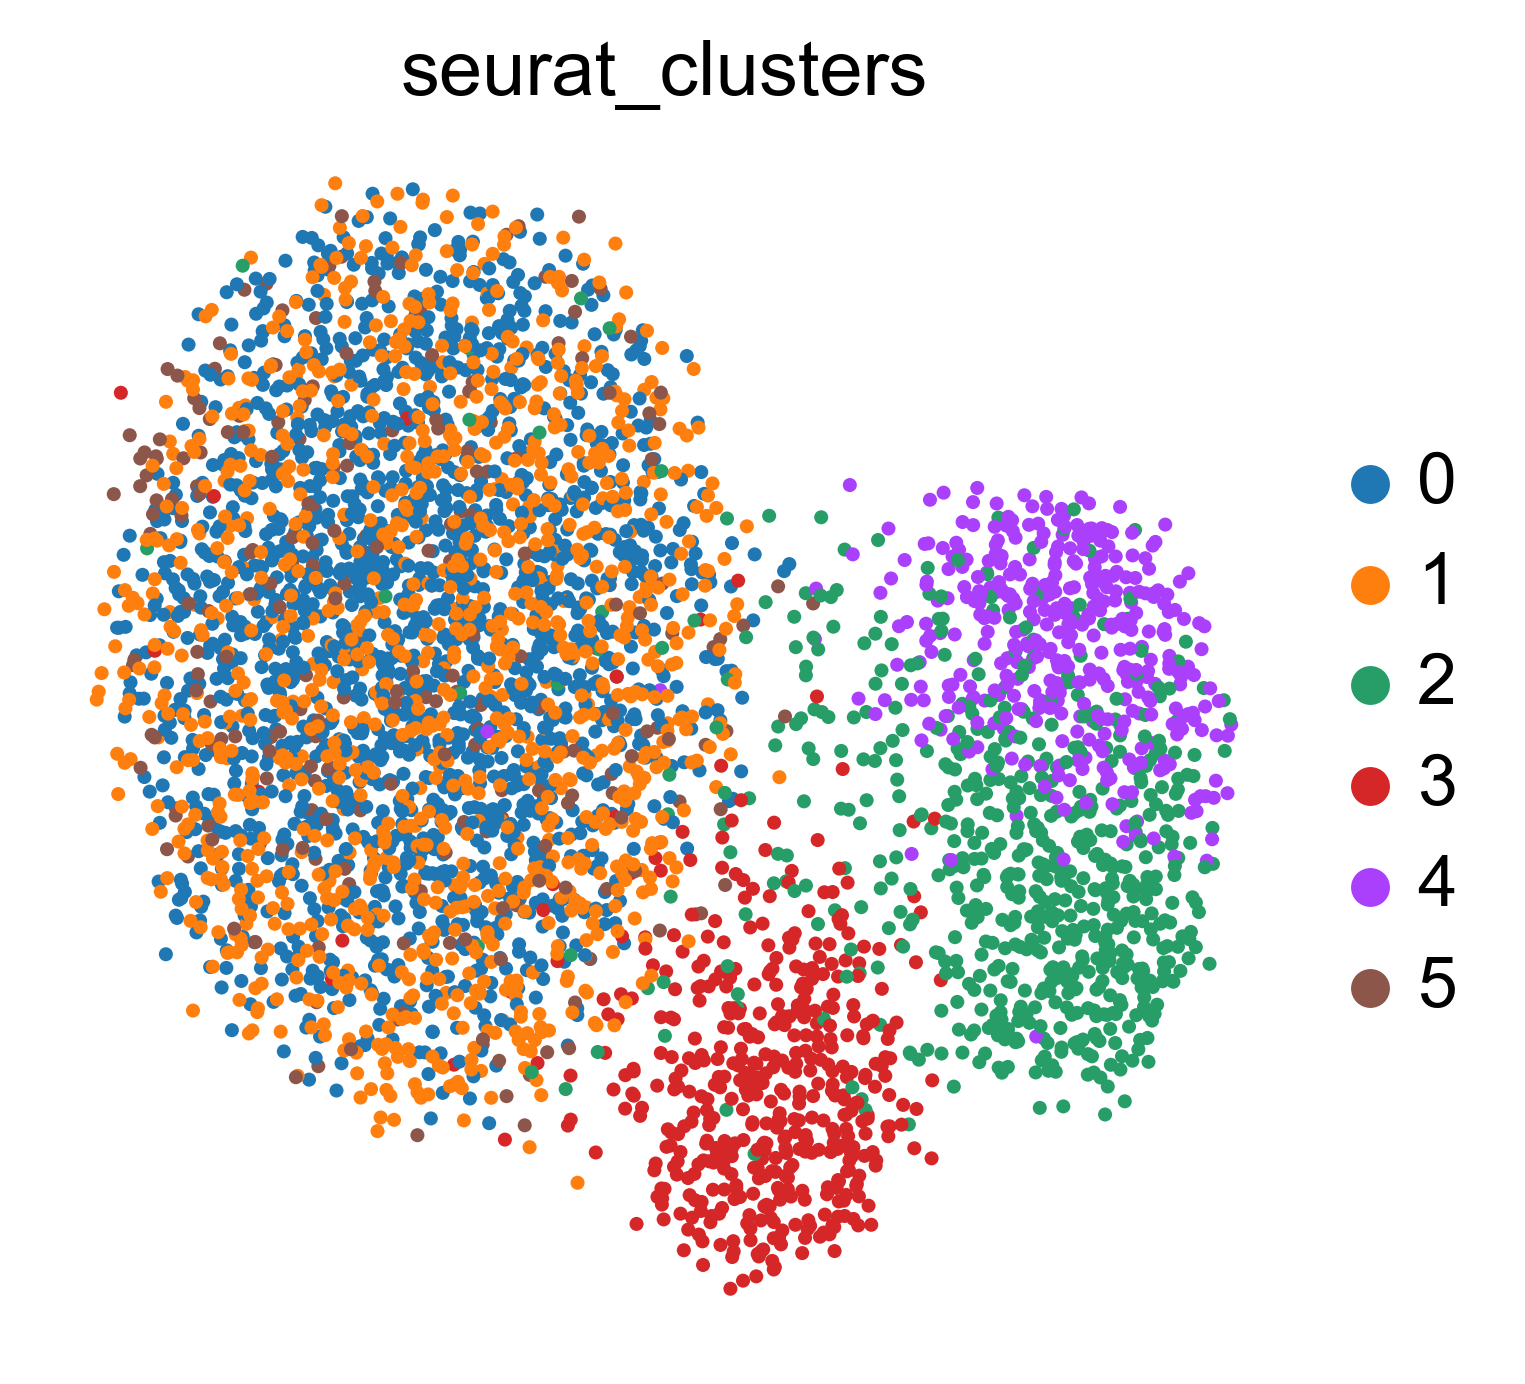

In [ ]:
sc.pl.umap(hips, color=['nFeature_RNA', 'sample_name'], frameon=False)

In [111]:
# Lees de tyser-dataset
tyser = sc.read('tyser.h5ad')

# Controleer de overlap van genen
missing_genes = [gene for gene in hips.var_names if gene not in tyser.var_names]
print(f"Aantal genen in hips die niet in tyser staan: {len(missing_genes)}")
print("Ontbrekende genen:", missing_genes)


Aantal genen in hips die niet in tyser staan: 4
Ontbrekende genen: ['HLA-A', 'HLA-C', 'HLA-B', 'ERCC6']


In [112]:
# Filter genen die aanwezig zijn in beide datasets
common_genes = [gene for gene in hips.var_names if gene in tyser.var_names]

# Pas de filtering toe op beide datasets
hips = hips[:, common_genes].copy()
tyser = tyser[:, common_genes].copy()


In [114]:
kang = sc.read('tyser.h5ad')[:, hips.var_names].copy()

In [115]:
# Controleer of var_names overeenkomen
print("Aantal genen in beide datasets na filtering:", len(common_genes))
print("Zijn genen nu identiek?", np.array_equal(hips.var_names, tyser.var_names))


Aantal genen in beide datasets na filtering: 1964
Zijn genen nu identiek? True


In [ ]:
#kang.obs['study'] = 'Kang'